# Embedding Visualizations
by: Jack Skupien

*\*Note: to get a more interactive 3d-visualization,run desired scripts in this directory individually*

### Imports and Initialization

In [63]:
#math/parsing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#visualization
import matplotlib.pyplot as plt         #visualizing
from mpl_toolkits.mplot3d import Axes3D #3d visualizing
plt.style.use('dark_background')        #dark mode

#debugging
import os                               #listdir

#path initialization (Change if running elsewhere)
path="../Embeddings"
dirEntries=os.listdir(path)
#preview directory to ensure we're in the right place
for entry in dirEntries:
    print(entry)

print("\n\nNOTE-- This notebook won't work as intended if the above output doesn't match the following:")
print("\nT5_sum_embeddings.csv\
      \nnGemini_sum_embeddings.csv\
      \nPegasus_sum_embeddings.csv\
      \nBart_sum_embeddings.csv")


Pegasus_sum_embeddings-clean.csv
T5_sum_embeddings.csv
T5_sum_embeddings-clean.csv
Gemini_sum_embeddings.csv
Gemini_sum_embeddings-clean.csv
Pegasus_sum_embeddings.csv
Bart_sum_embeddings.csv


NOTE-- This notebook won't work as intended if the above output doesn't match the following:

T5_sum_embeddings.csv      
nGemini_sum_embeddings.csv      
Pegasus_sum_embeddings.csv      
Bart_sum_embeddings.csv


## A Function to Remove Newlines/Carriage Returns From a CSV File
(some of the generated CSV files feature a bunch of newlines that make the comma-separation functionality impossible for a program to read)

ARG USAGE:
* `path`: relative path to the file you want to format
* `file`: name of the file you want to format*

*\*NOTE: do not include ".csv" at the end*

In [64]:
import csv

def format_file(path="../Embeddings/",file="Gemini_sum_embeddings"):
    # Paths
    input_path=path + file + ".csv"
    output_path=path + file + "-clean.csv"

    # Open the input and output files
    with open(input_path,'r',encoding='utf-8',newline='') as infile,\
         open(output_path,'w',encoding='utf-8',newline='') as outfile:

        reader=csv.reader(infile)
        writer=csv.writer(outfile,quoting=csv.QUOTE_ALL)

        header=next(reader)  # Read the header
        writer.writerow(header)  # Write the header unchanged

        for row in reader:
            if len(row) != 2:
                continue  # Skip bad rows

            # Remove internal newlines from both fields
            clean_row=[field.replace('\n',' ').replace('\r',' ') for field in row]
            writer.writerow(clean_row)

    print(f"Cleaned CSV saved to {output_path}")

## BART Embeddings Visualization Function
ARG USAGE:
* `preview_dir`: set to `True` to show a few lines from the CSV as a preview (default: True)
* `two_dim`: set to `True` to show 2D visualization (default: True)
* `three_dim`: set to `True` to show 3D visualization (default: True)
* `path`: the path to the directory of the desired embeddings folder (default: '../Embeddings')

In [71]:
def visualize_BART(preview_dir=True,two_dim=True,three_dim=True,path='../Embeddings'):
    #print header
    print("------------------------BART VISUALIZATIONS------------------------")

    path=path+"/Bart_sum_embeddings.csv"
    #read CSV
    df=pd.read_csv(path)

    #show the first few rows
    print(df.head())

    #convert embeddings of the format "[0.1,0.2,...,0.5]" to lists
    if isinstance(df.iloc[0]['EMBEDDING'],str):
        df['EMBEDDING']=df['EMBEDDING'].apply(lambda x: np.array(eval(x)))

    #convert embeddings to a reduced 2D-array
    embeddings=np.stack(df['EMBEDDING'].values)

    #----------- 2D Vis ---------------- 

    #Reduce dimensions (Deciding between PCA for speed and TSNE for prettier separation)
    pca_2d=PCA(n_components=2)
    embeddings_2d=pca_2d.fit_transform(embeddings)

    # tsne=TSNE(n_components=2,random_state=42)
    # embeddings_2d=tsne.fit_transform(embeddings)

    #matplotlib
    plt.figure(figsize=(10,7))
    plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],alpha=0.6)
    plt.title('2D Visualization of BART Summarization Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    #----------- 3D Vis ---------------- 
    pca_3d=PCA(n_components=3)
    embeddings_3d=pca_3d.fit_transform(embeddings)

    fig=plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111,projection='3d')
    sc=ax.scatter(embeddings_3d[:,0],embeddings_3d[:,1],embeddings_3d[:,2],alpha=0.6)

    ax.set_title('3D Visualization of BART Summarization Embeddings (PCA)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.show()

------------------------BART VISUALIZATIONS------------------------
                                           EMBEDDING  \
0  [0.03083260916173458, 0.011003361083567142, 0....   
1  [0.034989457577466965, -0.004561776295304298, ...   
2  [0.017147246748209, 0.019693424925208092, -0.0...   
3  [0.01814470812678337, -0.043714772909879684, 0...   
4  [0.018345462158322334, -0.025861864909529686, ...   

                                                TEXT  
0  An 81 year old Russian speaking only woman bro...  
1  The patient has a right subtrochanteric femur ...  
2  60 year old female pedestrian struck at ~30 mp...  
3  66 year old man has a history of hypertension,...  
4  A 62-year-old woman was found to be febrile an...  


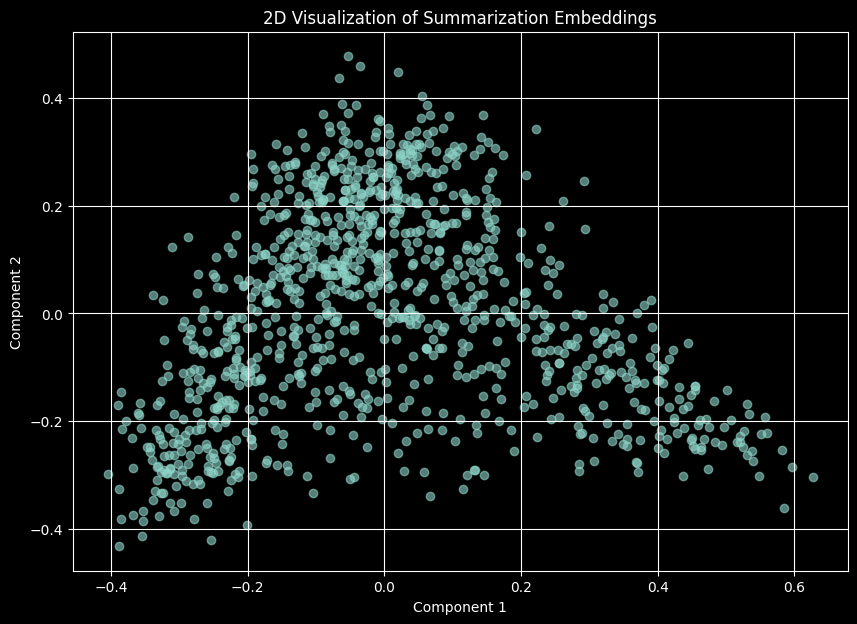

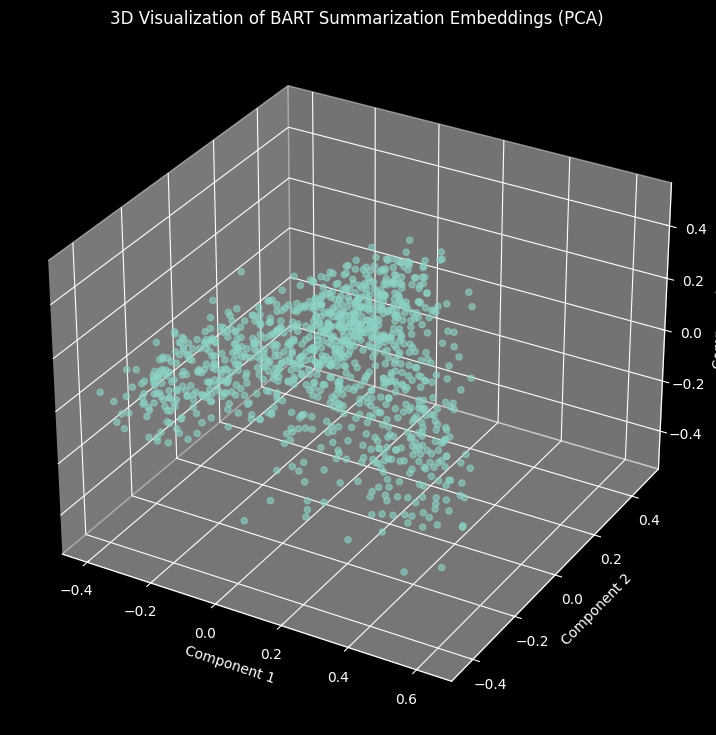

In [ ]:
#visualize BART (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_BART(path=path)

# Gemini Embeddings Visualization Function

ARG USAGE:
* `preview_dir`: set to `True` to show a few lines from the CSV as a preview (default: True)
* `two_dim`: set to `True` to show 2D visualization (default: True)
* `three_dim`: set to `True` to show 3D visualization (default: True)
* `path`: the path to the directory of the desired embeddings folder (default: '../Embeddings')

In [67]:
def visualize_gemini(preview_dir=True,two_dim=True,three_dim=True,path='../Embeddings'):
    #print header
    print("-----------------------GEMINI VISUALIZATIONS-----------------------")

    #clean Gemini embeddings CSV
    file="/Gemini_sum_embeddings"
    format_file(path=path,file=file)
    path=path+"/"+file+"-clean.csv"
    
    #read CSV
    df=pd.read_csv(path)

    #print first few rows
    print(df.head())

    #convert embeddings of the format "[0.1,0.2,...,0.5]" to lists
    if isinstance(df.iloc[0]['EMBEDDING'],str):
        df['EMBEDDING']=df['EMBEDDING'].apply(lambda x: np.array(eval(x)))

    #stack embeddings into a 2D array
    embeddings=np.stack(df['EMBEDDING'].values)

    #------------------ 2D Visualization ------------------#
    pca_2d=PCA(n_components=2)
    embeddings_2d=pca_2d.fit_transform(embeddings)

    plt.figure(figsize=(10,7))
    plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],alpha=0.6)
    plt.title('2D Visualization of Gemini Summarization Embeddings (PCA)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    #------------------ 3D Visualization ------------------#
    pca_3d=PCA(n_components=3)
    embeddings_3d=pca_3d.fit_transform(embeddings)

    fig=plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(embeddings_3d[:,0],embeddings_3d[:,1],embeddings_3d[:,2],alpha=0.6)

    ax.set_title('3D Visualization of Gemini Summarization Embeddings (PCA)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    plt.show()

In [ ]:
#visualize Gemini (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_gemini(path=path)

# Pegasus Embeddings Visualization Function

ARG USAGE:
* `preview_dir`: set to `True` to show a few lines from the CSV as a preview (default: True)
* `two_dim`: set to `True` to show 2D visualization (default: True)
* `three_dim`: set to `True` to show 3D visualization (default: True)
* `path`: the path to the directory of the desired embeddings folder (default: '../Embeddings')

In [68]:
def visualize_pegasus(preview_dir=True,two_dim=True,three_dim=True,path='../Embeddings'):
    #print header
    print("-----------------------PEGASUS VISUALIZATIONS----------------------")

    #clean Pegasus embeddings CSV
    file="/Pegasus_sum_embeddings"
    format_file(path=path,file=file)
    path=path+"/"+file+"-clean.csv"
    
    #read CSV
    df=pd.read_csv(path)

    #show first few rows
    print(df.head())

    #convert embeddings of the format "[0.1,0.2,...,0.5]" to lists
    if isinstance(df.iloc[0]['EMBEDDING'],str):
        df['EMBEDDING']=df['EMBEDDING'].apply(lambda x: np.array(eval(x)))

    #stack as 2D array
    embeddings=np.stack(df['EMBEDDING'].values)

    #------------------ 2D Visualization ------------------#
    pca_2d=PCA(n_components=2)
    embeddings_2d=pca_2d.fit_transform(embeddings)

    plt.figure(figsize=(10,7))
    plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],alpha=0.6)
    plt.title('2D Visualization of Pegasus Summarization Embeddings (PCA)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    #------------------ 3D Visualization ------------------#
    pca_3d=PCA(n_components=3)
    embeddings_3d=pca_3d.fit_transform(embeddings)

    fig=plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(embeddings_3d[:,0],embeddings_3d[:,1],embeddings_3d[:,2],alpha=0.6)

    ax.set_title('3D Visualization of Pegasus Summarization Embeddings (PCA)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    plt.show()

In [ ]:
#visualize Pegasus (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_pegasus(path=path)

# T5 Embeddings Visualization Function

ARG USAGE:
* `preview_dir`: set to `True` to show a few lines from the CSV as a preview (default: True)
* `two_dim`: set to `True` to show 2D visualization (default: True)
* `three_dim`: set to `True` to show 3D visualization (default: True)
* `path`: the path to the directory of the desired embeddings folder (default: '../Embeddings')

In [69]:
def visualize_T5(preview_dir=True,two_dim=True,three_dim=True,path='../Embeddings'):
    #print header
    print("-------------------------T5 VISUALIZATIONS-------------------------")

    #clean T5 embeddings CSV
    file="/T5_sum_embeddings"
    format_file(path=path,file=file)
    path=path+"/"+file+"-clean.csv"
    
    #read CSV
    df=pd.read_csv(path)

    #show first few rows
    print(df.head())

    #convert embeddings of the format "[0.1,0.2,...,0.5]" to lists
    if isinstance(df.iloc[0]['EMBEDDING'],str):
        df['EMBEDDING']=df['EMBEDDING'].apply(lambda x: np.array(eval(x)))

    #stack as 2D array
    embeddings=np.stack(df['EMBEDDING'].values)

    #------------------ 2D Visualization ------------------#
    pca_2d=PCA(n_components=2)
    embeddings_2d=pca_2d.fit_transform(embeddings)

    plt.figure(figsize=(10,7))
    plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],alpha=0.6)
    plt.title('2D Visualization of T5 Summarization Embeddings (PCA)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    #------------------ 3D Visualization ------------------#
    pca_3d=PCA(n_components=3)
    embeddings_3d=pca_3d.fit_transform(embeddings)

    fig=plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(embeddings_3d[:,0],embeddings_3d[:,1],embeddings_3d[:,2],alpha=0.6)

    ax.set_title('3D Visualization of T5 Summarization Embeddings (PCA)')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    plt.show()

In [ ]:
#visualize T5 (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_T5(path=path)

## Show All Embedding Visualizations

------------------------BART VISUALIZATIONS------------------------
                                           EMBEDDING  \
0  [0.03083260916173458, 0.011003361083567142, 0....   
1  [0.034989457577466965, -0.004561776295304298, ...   
2  [0.017147246748209, 0.019693424925208092, -0.0...   
3  [0.01814470812678337, -0.043714772909879684, 0...   
4  [0.018345462158322334, -0.025861864909529686, ...   

                                                TEXT  
0  An 81 year old Russian speaking only woman bro...  
1  The patient has a right subtrochanteric femur ...  
2  60 year old female pedestrian struck at ~30 mp...  
3  66 year old man has a history of hypertension,...  
4  A 62-year-old woman was found to be febrile an...  


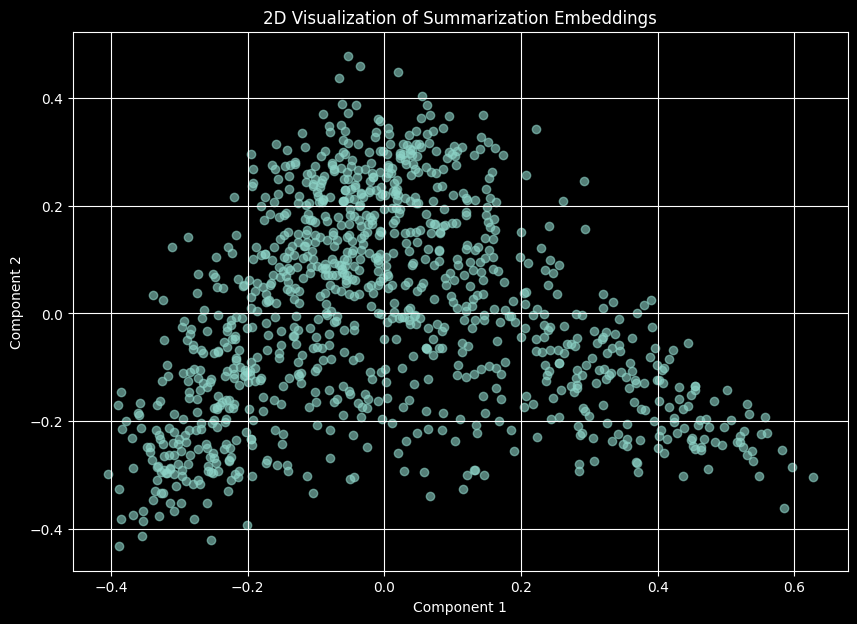

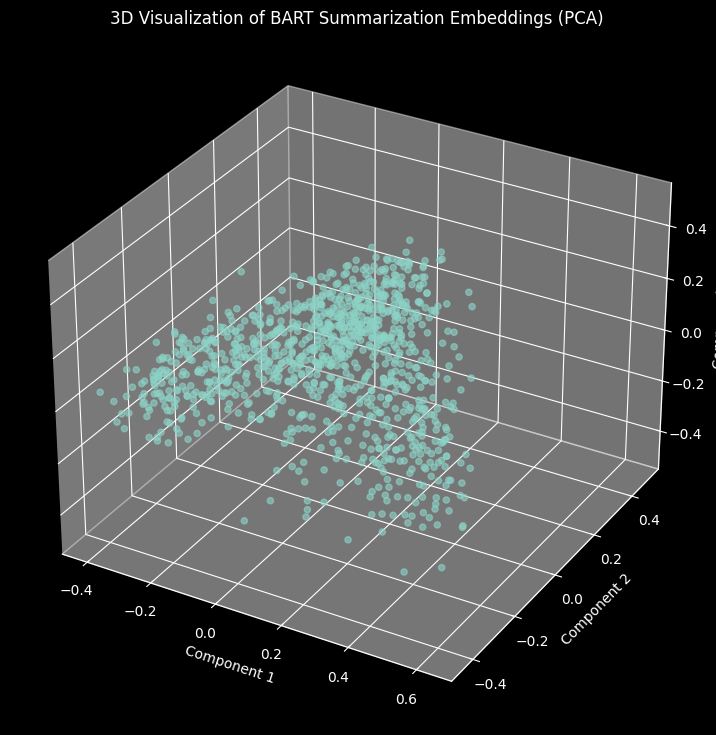

-----------------------GEMINI VISUALIZATIONS-----------------------
Cleaned CSV saved to ../Embeddings/Gemini_sum_embeddings-clean.csv
                                           EMBEDDING  \
0  [-0.004608682822436094, 0.07044307887554169, 0...   
1  [0.005264549516141415, 0.06649728119373322, 0....   
2  [0.006926591973751783, 0.05433780327439308, 0....   
3  [0.05260495841503143, -0.027609240263700485, 0...   
4  [0.016330154612660408, 0.00898651871830225, 0....   

                                                TEXT  
0  This 81-year-old Russian-speaking female was a...  
1  This is a discharge summary for an 87-year-old...  
2  This is a summary of a discharge summary for a...  
3  This 66-year-old male with a history of hypert...  
4  This is a summary of the discharge summary:  A...  


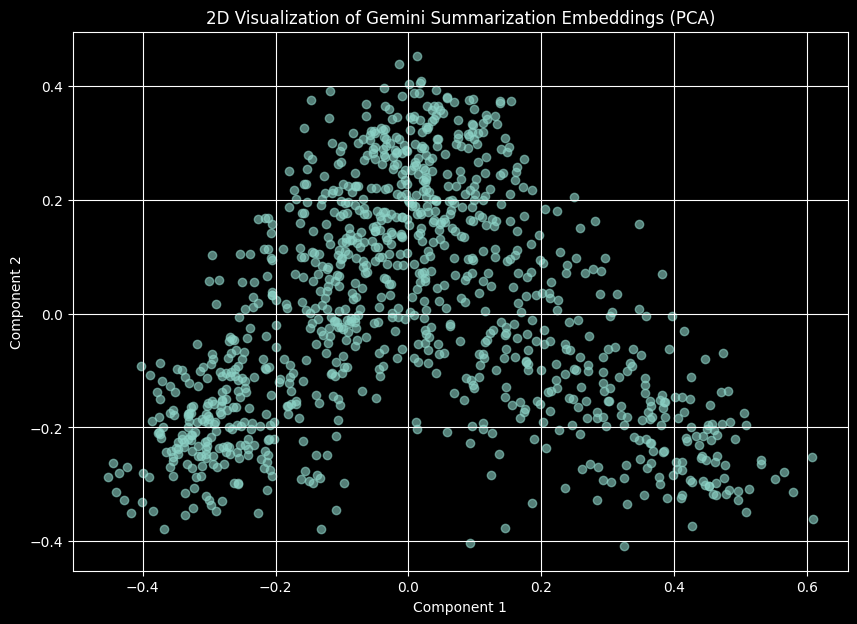

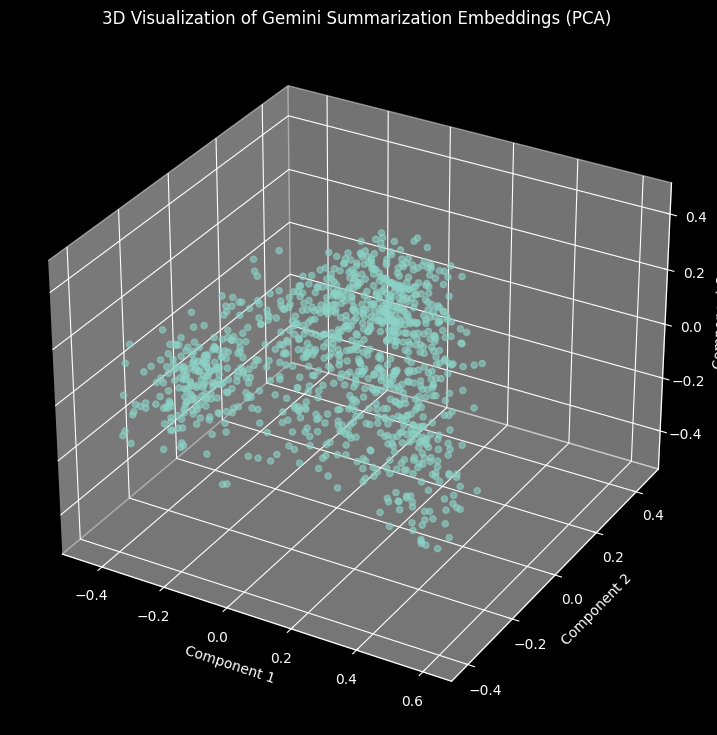

-----------------------PEGASUS VISUALIZATIONS----------------------
Cleaned CSV saved to ../Embeddings/Pegasus_sum_embeddings-clean.csv
                                           EMBEDDING  \
0  [0.030600806698203087, 0.016259338706731796, 0...   
1  [-0.001717100851237774, -0.01683730073273182, ...   
2  [-0.007348022423684597, 0.04000155255198479, 0...   
3  [0.03231886401772499, -0.028290865942835808, 0...   
4  [0.009540047496557236, -0.008968913927674294, ...   

                                                TEXT  
0  Key words: syncope, C-spine fracture, afib, sh...  
1  Key words: CHF, fall, pulmonary HTN, exudative...  
2  The following is a case report of a pedestrian...  
3  Description: A 66-year-old man with a history ...  
4  A woman with primary progressive MS in with sp...  


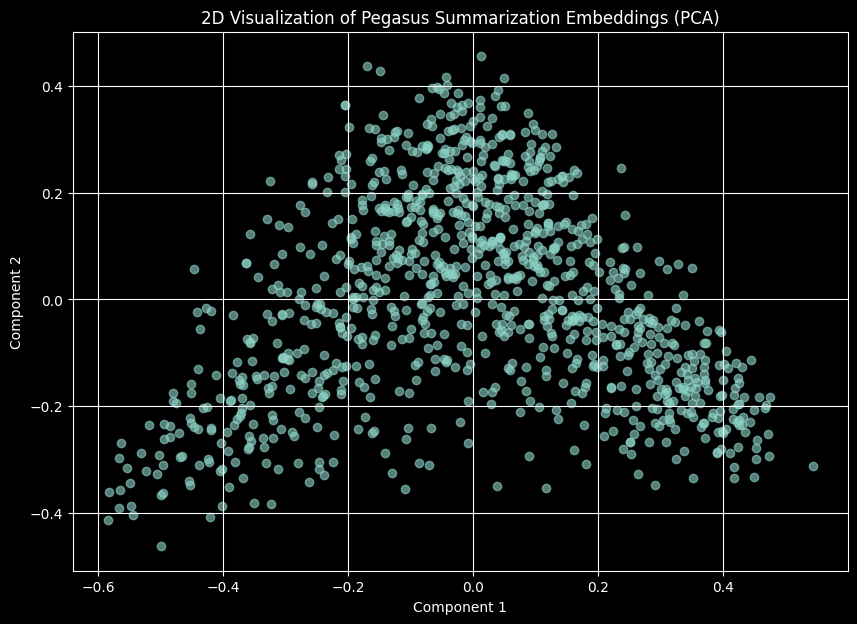

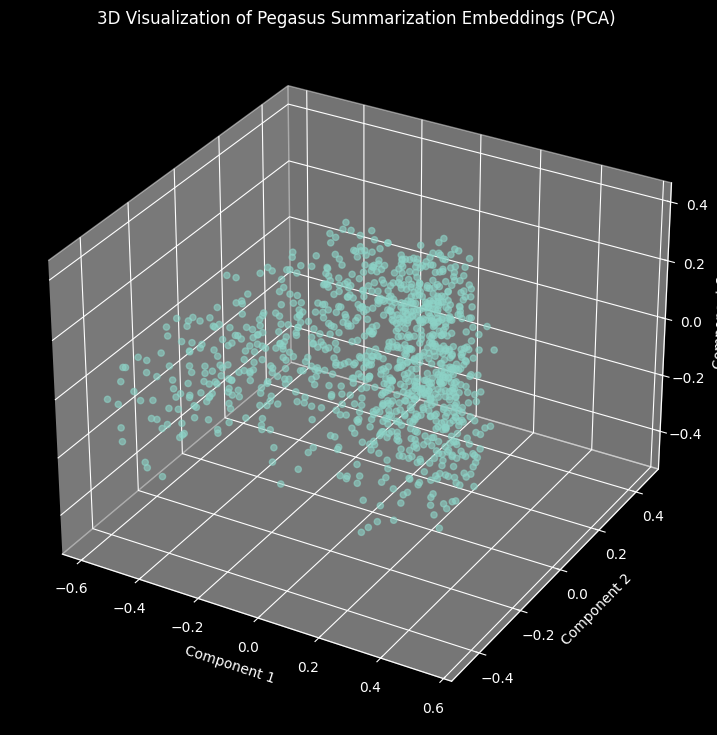

-------------------------T5 VISUALIZATIONS-------------------------
Cleaned CSV saved to ../Embeddings/T5_sum_embeddings-clean.csv
                                           EMBEDDING  \
0  [0.0031372234225273132, -0.03666612133383751, ...   
1  [0.005851645488291979, 0.017665505409240723, -...   
2  [-0.009507074020802975, 0.0007777817663736641,...   
3  [0.027012089267373085, -0.03434664011001587, 0...   
4  [0.012215780094265938, -0.04916498810052872, 0...   

                                                TEXT  
0  a 81 year old woman brought from home after a ...  
1  background : right subtrochanteric femur fract...  
2  a 60 year old female pedestrian struck at 30 m...  
3  a 66 year old man has a history of hypertensio...  
4  the pt was found at her nursing home yesterday...  


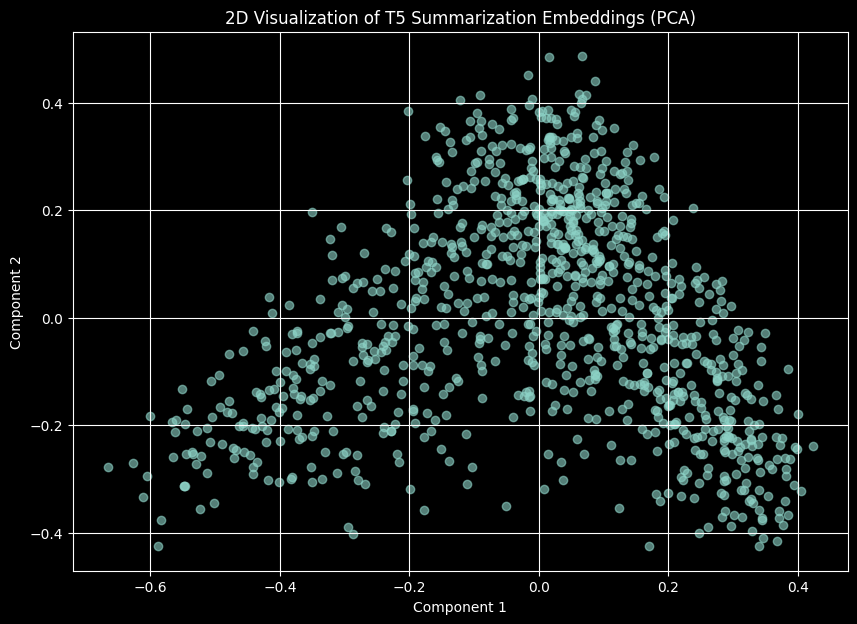

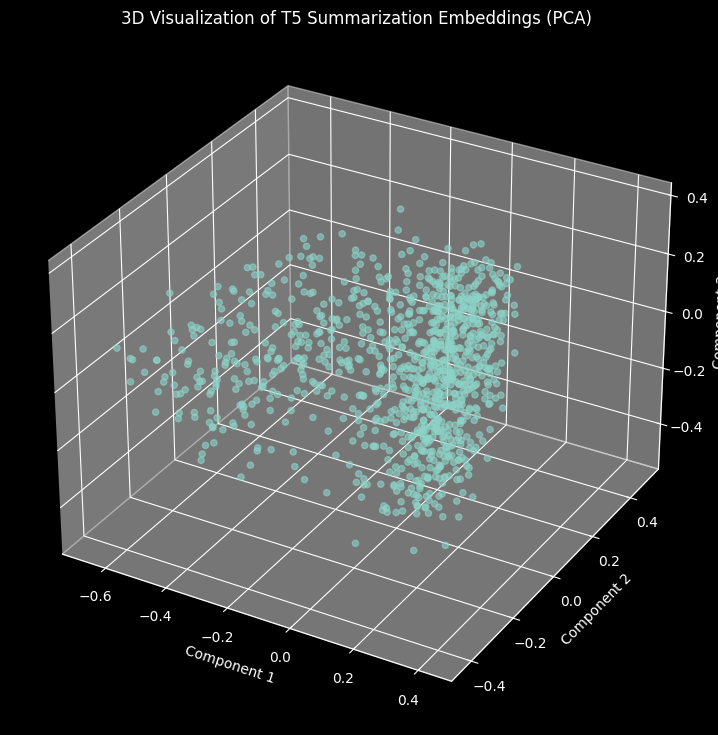

In [70]:
#visualize BART (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_BART(path=path)

#visualize Gemini (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_gemini(path=path)

#visualize Pegasus (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_pegasus(path=path)

#visualize Pegasus (by default: will show both 2d and 3d,as well as a preview of the directory)
visualize_T5(path=path)